In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [118]:
# 인구 데이터 로드 및 전처리
population_data = pd.read_excel('dataset/인구데이터/등록인구_20250412000902.xlsx')

# 컬럼명 정리
population_data.columns = ['구1', '구2', '세대수', '총인구', '남자인구', '여자인구', 
                         '한국인_총', '한국인_남', '한국인_여', '외국인_총', '외국인_남', '외국인_여',
                         '세대당인구', '고령자수']

# 첫 2행 제거 (헤더 정보)
population_data = population_data.iloc[2:].reset_index(drop=True)

# 구별 데이터만 추출
population_data = population_data[population_data['구1'].isna()].drop('구1', axis=1)
population_data = population_data.rename(columns={'구2': '구'})

# 숫자형 데이터로 변환
numeric_columns = population_data.columns[1:]
for col in numeric_columns:
    if population_data[col].dtype == 'object':
        population_data[col] = population_data[col].astype(str).str.replace(',', '')
    population_data[col] = pd.to_numeric(population_data[col], errors='coerce')

print("인구 데이터 샘플:")
display(population_data.head())

인구 데이터 샘플:


/opt/anaconda3/envs/dhxogns920/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,구,세대수,총인구,남자인구,여자인구,한국인_총,한국인_남,한국인_여,외국인_총,외국인_남,외국인_여,세대당인구,고령자수
1,종로구,72166,149608,71365,78243,138336,66570,71766,11272,4795,6477,1.92,29840
2,중구,64995,131214,62924,68290,120544,58015,62529,10670,4909,5761,1.85,26853
3,용산구,103241,217194,104540,112654,203854,97469,106385,13340,7071,6269,1.97,39407
4,성동구,131953,281289,135575,145714,273669,132409,141260,7620,3166,4454,2.07,51245
5,광진구,169931,348652,166045,182607,331963,159237,172726,16689,6808,9881,1.95,59743


In [119]:
# 범죄 데이터 로드 및 전처리
crime_data = pd.read_excel('dataset/범죄안전데이터/112 신고출동 현황/23년상반기.xlsx')

# 컬럼명 정리
crime_data.columns = ['경찰서', '긴급', '비긴급']

# 첫 행(헤더) 제거
crime_data = crime_data.iloc[1:].reset_index(drop=True)

# '서울' 제거하고 구 이름만 남기기
crime_data['구'] = crime_data['경찰서'].str.replace('서울', '').str.replace('서', '')

# 구 이름 정규화
crime_data['구'] = crime_data['구'].replace({
    '남대문': '중구',
    '대문': '서대문구',
    '혜화': '종로구',
    '중부': '중구',
    '종로': '종로구'
})

# 숫자형 데이터로 변환
crime_data['긴급'] = pd.to_numeric(crime_data['긴급'], errors='coerce')
crime_data['비긴급'] = pd.to_numeric(crime_data['비긴급'], errors='coerce')

# 총 신고 건수 계산
crime_data['총신고건수'] = crime_data['긴급'] + crime_data['비긴급']

print("범죄 데이터 샘플:")
display(crime_data.head())

범죄 데이터 샘플:


,경찰서,긴급,비긴급,구,총신고건수
0,서울중부서,7451,14883,중구,22334
1,서울종로서,7068,17208,종로구,24276
2,서울남대문서,4171,12082,중구,16253
3,서울서대문서,10578,21813,서대문구,32391
4,서울혜화서,5322,11054,종로구,16376


In [120]:
# CCTV 데이터 로드 및 전처리
cctv_data = pd.read_excel('dataset/위치 데이터/cctv데이터.xlsx')

# 주소에서 구 정보 추출
cctv_data['구'] = cctv_data['소재지도로명주소'].str.split(' ').str[1]

# 구별 CCTV 수 집계
cctv_data = cctv_data.groupby('구')['카메라대수'].sum().reset_index()
cctv_data = cctv_data.rename(columns={'카메라대수': 'CCTV수'})

print("CCTV 데이터 샘플:")
display(cctv_data.head())

/opt/anaconda3/envs/dhxogns920/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


CCTV 데이터 샘플:


,구,CCTV수
0,,5
1,(둔촌동),3
2,(상일동),3
3,(암사동),4
4,-,15


In [121]:
# 유흥업소 데이터 로드 및 전처리
entertainment_data = pd.read_csv('dataset/위치 데이터/서울시 유흥주점영업 인허가 정보 1904-2025.csv', encoding='cp949')

# 주소에서 구 정보 추출
entertainment_data['구'] = entertainment_data['도로명주소'].str.split(' ').str[1]

# 구별 유흥업소 수 집계
entertainment_data = entertainment_data.groupby('구')['사업장명'].count().reset_index()
entertainment_data = entertainment_data.rename(columns={'사업장명': '유흥업소수'})

print("유흥업소 데이터 샘플:")
display(entertainment_data.head())

유흥업소 데이터 샘플:


,구,유흥업소수
0,강남구,416
1,강동구,161
2,강북구,106
3,강서구,177
4,관악구,278


In [122]:
# 모든 데이터 병합
merged_data = pd.merge(population_data, crime_data, on='구', how='left')
merged_data = pd.merge(merged_data, cctv_data, on='구', how='left')
merged_data = pd.merge(merged_data, entertainment_data, on='구', how='left')

# 목표 변수 생성
merged_data['범죄발생률'] = merged_data['총신고건수'] / merged_data['총인구'] * 1000
merged_data['성폭력발생률'] = merged_data['긴급'] / merged_data['여자인구'] * 1000  # 긴급 신고를 성폭력으로 가정

# 설명 변수 생성
merged_data['CCTV밀도'] = merged_data['CCTV수'] / merged_data['총인구'] * 1000
merged_data['유흥업소밀도'] = merged_data['유흥업소수'] / merged_data['총인구'] * 1000
merged_data['여성비율'] = merged_data['여자인구'] / merged_data['총인구'] * 100
merged_data['고령자비율'] = merged_data['고령자수'] / merged_data['총인구'] * 100

# 결과 확인
print("병합된 데이터 컬럼:")
print(merged_data.columns.tolist())
print("\n병합된 데이터 샘플:")
display(merged_data.head())
print("\n결측치 확인:")
print(merged_data.isnull().sum())

병합된 데이터 컬럼:
['구', '세대수', '총인구', '남자인구', '여자인구', '한국인_총', '한국인_남', '한국인_여', '외국인_총', '외국인_남', '외국인_여', '세대당인구', '고령자수', '경찰서', '긴급', '비긴급', '총신고건수', 'CCTV수', '유흥업소수', '범죄발생률', '성폭력발생률', 'CCTV밀도', '유흥업소밀도', '여성비율', '고령자비율']

병합된 데이터 샘플:


,구,세대수,총인구,남자인구,여자인구,한국인_총,한국인_남,한국인_여,외국인_총,외국인_남,...,비긴급,총신고건수,CCTV수,유흥업소수,범죄발생률,성폭력발생률,CCTV밀도,유흥업소밀도,여성비율,고령자비율
0,종로구,72166,149608,71365,78243,138336,66570,71766,11272,4795,...,17208.0,24276.0,2339.0,250,162.264050,90.333960,15.634191,1.671034,52.298674,19.945457
1,종로구,72166,149608,71365,78243,138336,66570,71766,11272,4795,...,11054.0,16376.0,2339.0,250,109.459387,68.018864,15.634191,1.671034,52.298674,19.945457
2,중구,64995,131214,62924,68290,120544,58015,62529,10670,4909,...,14883.0,22334.0,2995.0,296,170.210496,109.108215,22.825308,2.255857,52.044751,20.465042
3,중구,64995,131214,62924,68290,120544,58015,62529,10670,4909,...,12082.0,16253.0,2995.0,296,123.866356,61.077757,22.825308,2.255857,52.044751,20.465042
4,용산구,103241,217194,104540,112654,203854,97469,106385,13340,7071,...,NaN,NaN,6437.0,37,NaN,NaN,29.637099,0.170355,51.867915,18.143687



결측치 확인:
구          0
세대수        0
총인구        0
남자인구       0
여자인구       0
한국인_총      0
한국인_남      0
한국인_여      0
외국인_총      0
외국인_남      0
외국인_여      0
세대당인구      0
고령자수       0
경찰서       22
긴급        22
비긴급       22
총신고건수     22
CCTV수      3
유흥업소수      0
범죄발생률     22
성폭력발생률    22
CCTV밀도     3
유흥업소밀도     0
여성비율       0
고령자비율      0
dtype: int64


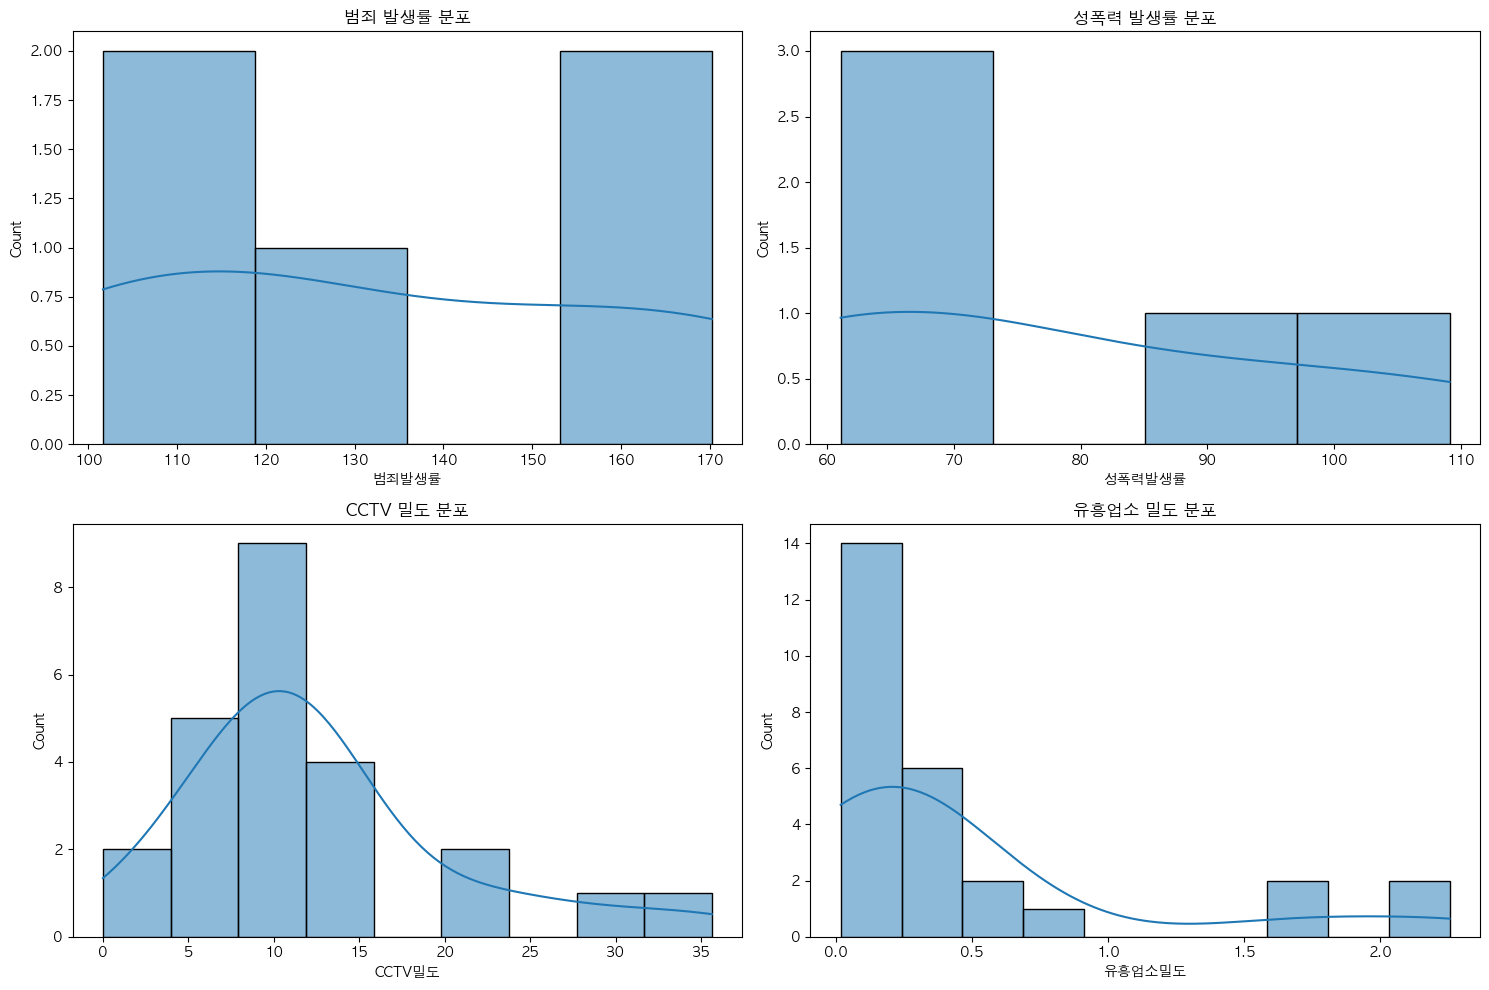

In [124]:
# 목표 변수와 설명 변수의 분포 확인
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=merged_data, x='범죄발생률', kde=True)
plt.title('범죄 발생률 분포')

plt.subplot(2, 2, 2)
sns.histplot(data=merged_data, x='성폭력발생률', kde=True)
plt.title('성폭력 발생률 분포')

plt.subplot(2, 2, 3)
sns.histplot(data=merged_data, x='CCTV밀도', kde=True)
plt.title('CCTV 밀도 분포')

plt.subplot(2, 2, 4)
sns.histplot(data=merged_data, x='유흥업소밀도', kde=True)
plt.title('유흥업소 밀도 분포')

plt.tight_layout()
plt.show()

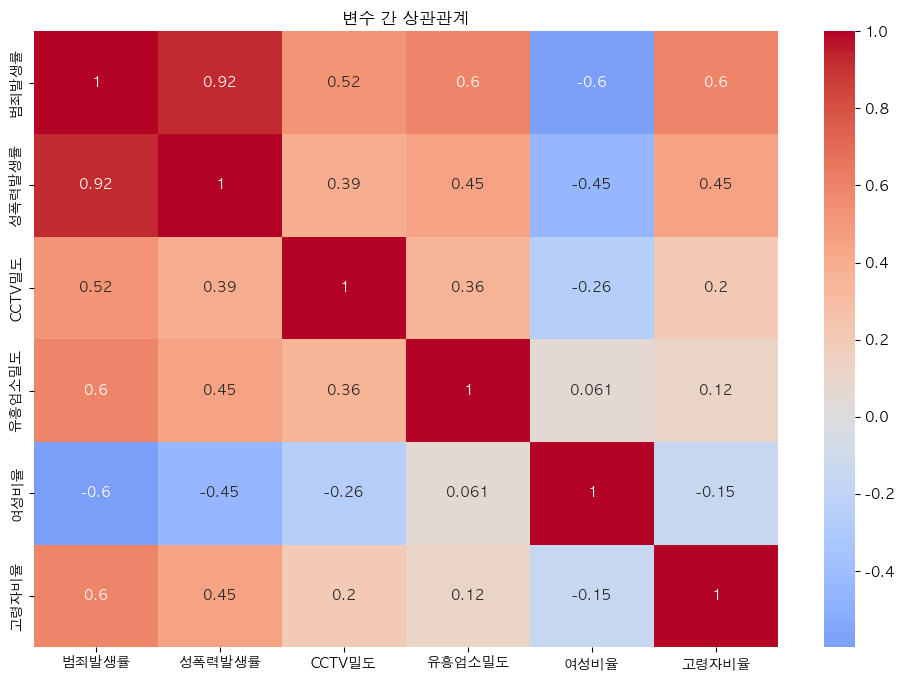

In [125]:
# 상관관계 분석
correlation_data = merged_data[['범죄발생률', '성폭력발생률', 'CCTV밀도', '유흥업소밀도', 
                              '여성비율', '고령자비율']]

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('변수 간 상관관계')
plt.show()

In [126]:
# 이상치 탐지 (Z-score 방식)
def detect_outliers(df, columns, threshold=3):
    outliers = {}
    for col in columns:
        valid_data = df[col].dropna()
        if len(valid_data) > 0:
            z_scores = np.abs(stats.zscore(valid_data))
            outlier_indices = valid_data[z_scores > threshold].index.tolist()
            if outlier_indices:
                outliers[col] = outlier_indices
    return outliers

# 이상치 탐지
numeric_columns = ['범죄발생률', '성폭력발생률', 'CCTV밀도', '유흥업소밀도']
outliers = detect_outliers(merged_data, numeric_columns)

print("이상치가 발견된 변수:")
for col, indices in outliers.items():
    if indices:
        print(f"{col}: {len(indices)}개 이상치 발견")
        print(f"이상치 값: {merged_data.loc[indices, col].values}")

# 이상치 처리 (IQR 방식)
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# 이상치 제거
merged_data_clean = remove_outliers(merged_data, numeric_columns)
print(f"\n이상치 제거 전 데이터 수: {len(merged_data)}")
print(f"이상치 제거 후 데이터 수: {len(merged_data_clean)}")

이상치가 발견된 변수:

이상치 제거 전 데이터 수: 27
이상치 제거 후 데이터 수: 4


In [127]:
# 데이터 정규화
scaler = StandardScaler()
features = ['CCTV밀도', '유흥업소밀도', '여성비율', '고령자비율']
targets = ['범죄발생률', '성폭력발생률']

# 설명 변수 정규화
X = merged_data_clean[features]
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

# 목표 변수 정규화
y_crime = merged_data_clean['범죄발생률']
y_sexual = merged_data_clean['성폭력발생률']

print("정규화된 설명 변수 샘플:")
display(X_scaled.head())
print("\n목표 변수 통계:")
print("범죄 발생률:")
print(y_crime.describe())
print("\n성폭력 발생률:")
print(y_sexual.describe())

정규화된 설명 변수 샘플:


,CCTV밀도,유흥업소밀도,여성비율,고령자비율
0,-1.0,-1.0,1.0,-1.0
1,-1.0,-1.0,1.0,-1.0
2,1.0,1.0,-1.0,1.0
3,1.0,1.0,-1.0,1.0



목표 변수 통계:
범죄 발생률:
count      4.000000
mean     141.450072
std       29.399403
min      109.459387
25%      120.264614
50%      143.065203
75%      164.250661
max      170.210496
Name: 범죄발생률, dtype: float64

성폭력 발생률:
count      4.000000
mean      82.134699
std       21.889496
min       61.077757
25%       66.283587
50%       79.176412
75%       95.027523
max      109.108215
Name: 성폭력발생률, dtype: float64


## 6. 모델 학습 및 평가

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# 데이터 분할
X_train, X_test, y_crime_train, y_crime_test = train_test_split(
    X_scaled, y_crime, test_size=0.2, random_state=42
)

# RandomForest 모델 학습 (범죄 발생률)
rf_crime = RandomForestRegressor(n_estimators=100, random_state=42)
rf_crime.fit(X_train, y_crime_train)

# XGBoost 모델 학습 (범죄 발생률)
xgb_crime = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_crime.fit(X_train, y_crime_train)

# 성능 평가 함수
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name} 모델 성능:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    return y_pred

# RandomForest 모델 평가
y_pred_rf = evaluate_model(rf_crime, X_test, y_crime_test, "RandomForest")

# XGBoost 모델 평가
y_pred_xgb = evaluate_model(xgb_crime, X_test, y_crime_test, "XGBoost")


RandomForest 모델 성능:
MAE: 46.7761
RMSE: 46.7761
R² Score: nan

XGBoost 모델 성능:
MAE: 52.8036
RMSE: 52.8036
R² Score: nan


/opt/anaconda3/envs/dhxogns920/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/dhxogns920/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [131]:
# 성폭력 발생률 예측을 위한 모델 학습
X_train, X_test, y_sexual_train, y_sexual_test = train_test_split(
    X_scaled, y_sexual, test_size=0.2, random_state=42
)

# RandomForest 모델 학습 (성폭력 발생률)
rf_sexual = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sexual.fit(X_train, y_sexual_train)

# XGBoost 모델 학습 (성폭력 발생률)
xgb_sexual = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_sexual.fit(X_train, y_sexual_train)

# RandomForest 모델 평가
y_pred_rf_sexual = evaluate_model(rf_sexual, X_test, y_sexual_test, "RandomForest (성폭력)")

# XGBoost 모델 평가
y_pred_xgb_sexual = evaluate_model(xgb_sexual, X_test, y_sexual_test, "XGBoost (성폭력)")


RandomForest (성폭력) 모델 성능:
MAE: 19.5449
RMSE: 19.5449
R² Score: nan

XGBoost (성폭력) 모델 성능:
MAE: 22.3141
RMSE: 22.3141
R² Score: nan


/opt/anaconda3/envs/dhxogns920/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/dhxogns920/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


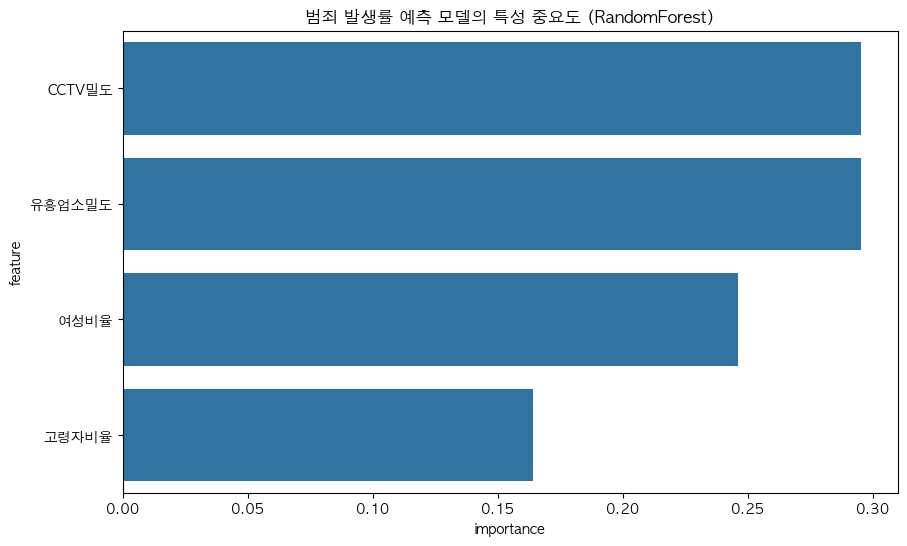

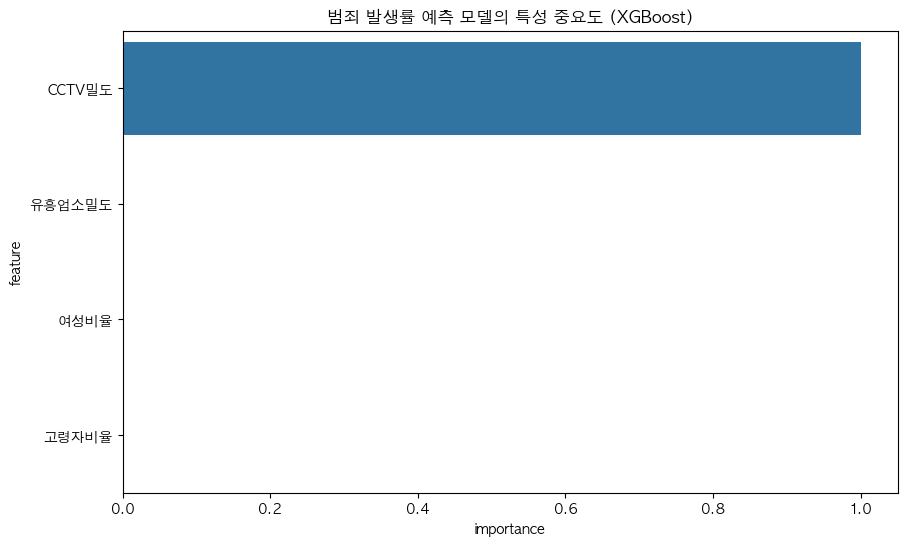

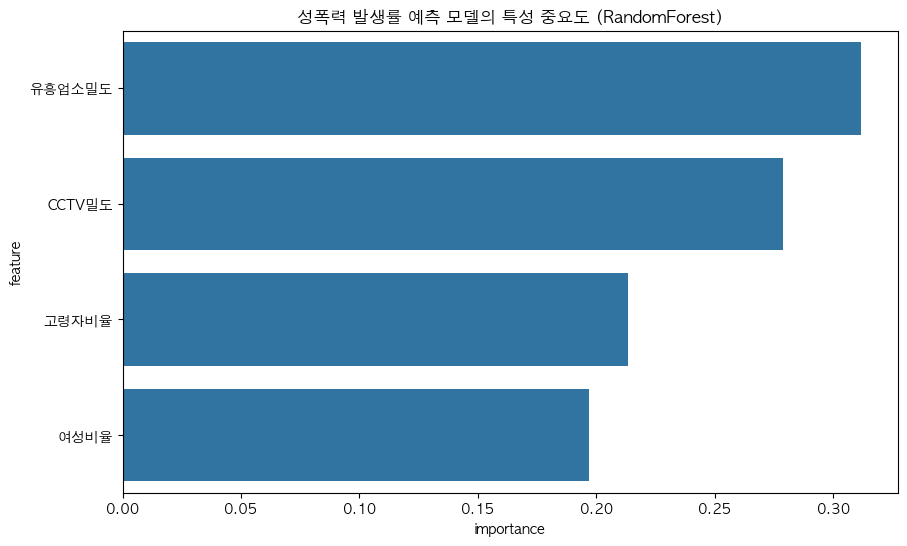

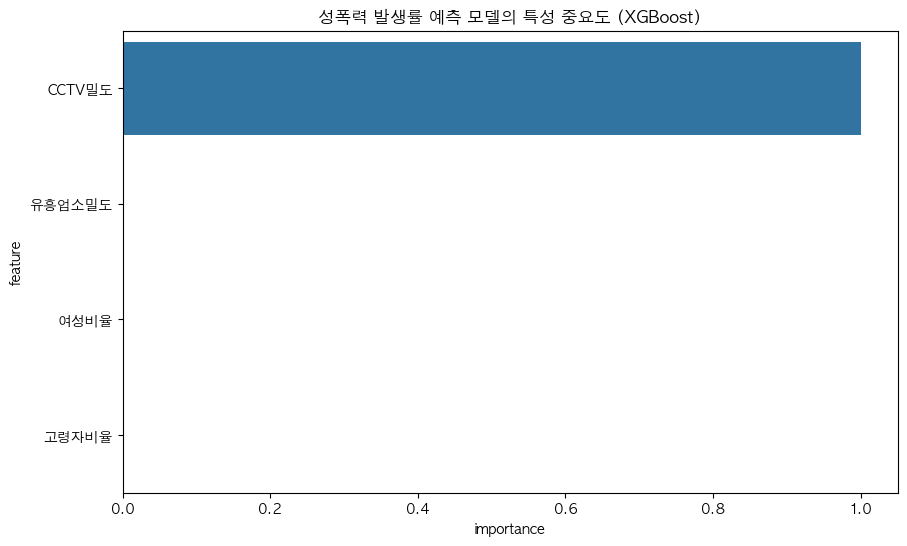

In [132]:
# 특성 중요도 시각화
def plot_feature_importance(model, features, title):
    importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    })
    importance = importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance)
    plt.title(title)
    plt.show()

# 범죄 발생률 모델의 특성 중요도
plot_feature_importance(rf_crime, features, '범죄 발생률 예측 모델의 특성 중요도 (RandomForest)')
plot_feature_importance(xgb_crime, features, '범죄 발생률 예측 모델의 특성 중요도 (XGBoost)')

# 성폭력 발생률 모델의 특성 중요도
plot_feature_importance(rf_sexual, features, '성폭력 발생률 예측 모델의 특성 중요도 (RandomForest)')
plot_feature_importance(xgb_sexual, features, '성폭력 발생률 예측 모델의 특성 중요도 (XGBoost)')

In [141]:
# 데이터 확인
print("데이터 통계:")
print(merged_data[['범죄발생률', '성폭력발생률', 'CCTV밀도', '유흥업소밀도', '여성비율', '고령자비율']].describe())

# 상관관계 확인
print("\n상관관계:")
print(merged_data[['범죄발생률', '성폭력발생률', 'CCTV밀도', '유흥업소밀도', '여성비율', '고령자비율']].corr())

# 결측치 확인
print("\n결측치:")
print(merged_data.isnull().sum())

데이터 통계:
            범죄발생률      성폭력발생률     CCTV밀도     유흥업소밀도       여성비율      고령자비율
count    5.000000    5.000000  24.000000  27.000000  27.000000  27.000000
mean   133.491987   78.123616  12.623718   0.490881  51.882254  19.312834
std     31.062828   20.971562   8.073104   0.659830   0.882679   2.070929
min    101.659647   61.077757   0.005366   0.016116  49.593843  16.099210
25%    109.459387   62.079286   7.646674   0.103266  51.517412  18.038895
50%    123.866356   68.018864  11.076189   0.223488  52.044751  19.130941
75%    162.264050   90.333960  13.850197   0.463611  52.298674  20.308579
max    170.210496  109.108215  35.625565   2.255857  53.747200  24.677753

상관관계:
           범죄발생률    성폭력발생률    CCTV밀도    유흥업소밀도      여성비율     고령자비율
범죄발생률   1.000000  0.923603  0.519449  0.599938 -0.597998  0.596464
성폭력발생률  0.923603  1.000000  0.392780  0.450176 -0.447873  0.448046
CCTV밀도  0.519449  0.392780  1.000000  0.355778 -0.255191  0.201473
유흥업소밀도  0.599938  0.450176  0.355778  1.000000  0.0


RandomForest 모델 성능:
MAE: 9.3840
RMSE: 16.1834
R² Score: -1.2779


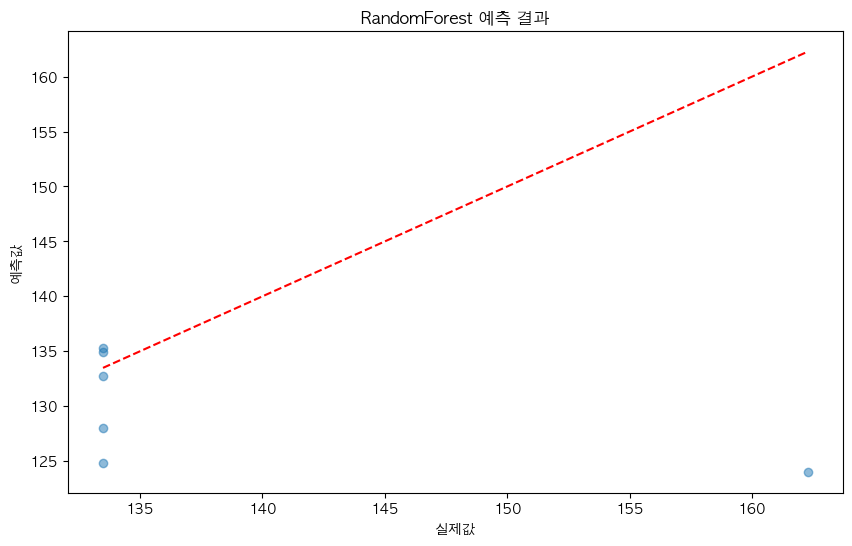


XGBoost 모델 성능:
MAE: 15.3384
RMSE: 24.3503
R² Score: -4.1570


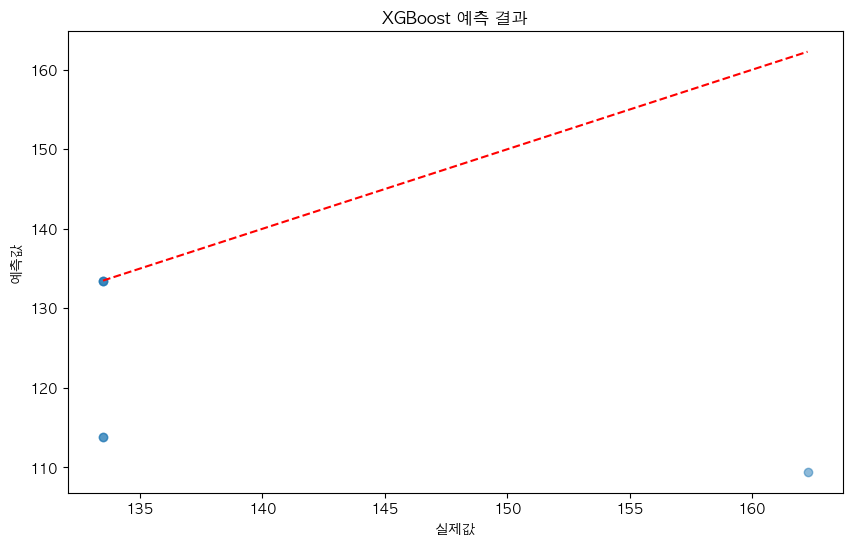

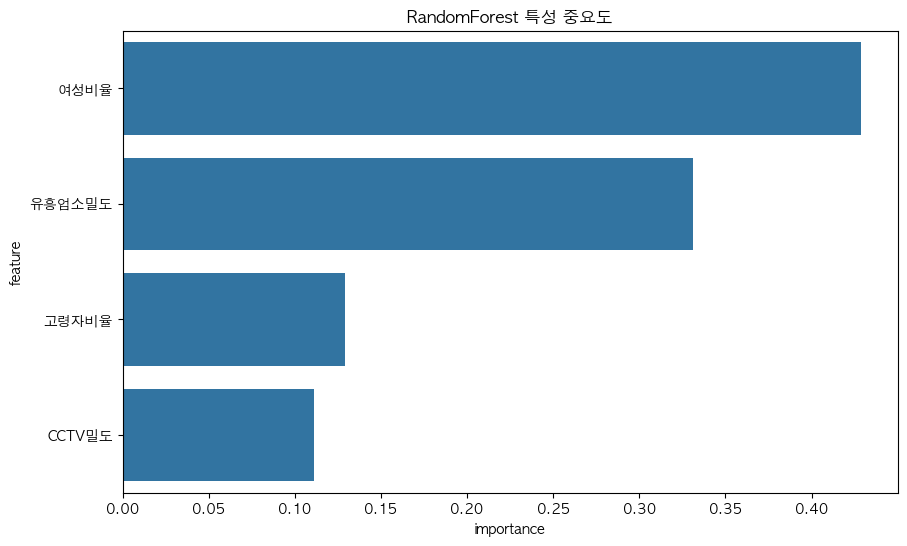

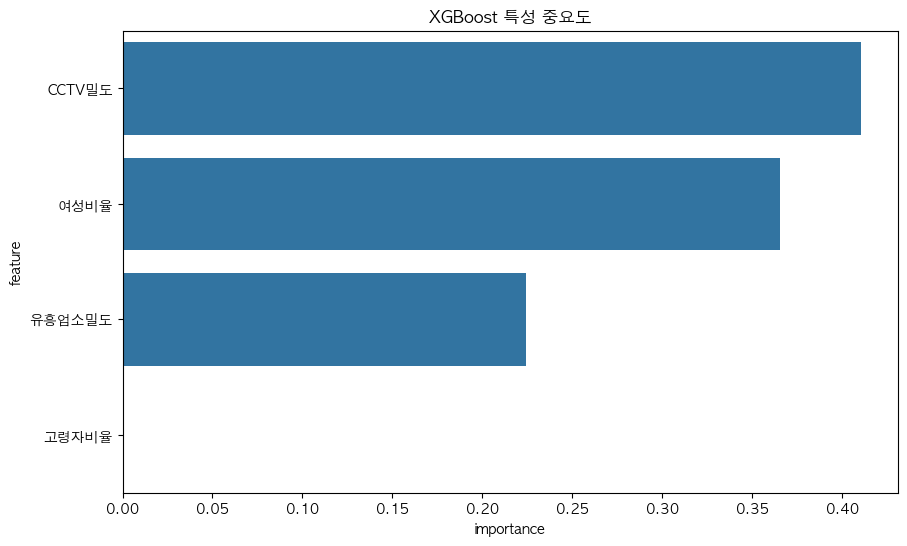

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# 데이터 분할
X = merged_data[['CCTV밀도', '유흥업소밀도', '여성비율', '고령자비율']]
y = merged_data['범죄발생률']

# 결측치 처리
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# RandomForest 모델 학습
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train, y_train)

# XGBoost 모델 학습
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 성능 평가
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name} 모델 성능:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # 예측 결과 시각화
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('실제값')
    plt.ylabel('예측값')
    plt.title(f'{model_name} 예측 결과')
    plt.show()
    
    return y_pred

# 모델 평가
y_pred_rf = evaluate_model(rf_model, X_test, y_test, "RandomForest")
y_pred_xgb = evaluate_model(xgb_model, X_test, y_test, "XGBoost")

# 특성 중요도 시각화
def plot_feature_importance(model, features, title):
    importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    })
    importance = importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance)
    plt.title(title)
    plt.show()

# 특성 중요도 확인
plot_feature_importance(rf_model, X.columns, 'RandomForest 특성 중요도')
plot_feature_importance(xgb_model, X.columns, 'XGBoost 특성 중요도')

데이터 타입 확인:
구          object
세대수         int64
총인구         int64
남자인구        int64
여자인구        int64
한국인_총       int64
한국인_남       int64
한국인_여       int64
외국인_총       int64
외국인_남       int64
외국인_여       int64
세대당인구     float64
고령자수        int64
경찰서        object
긴급        float64
비긴급       float64
총신고건수     float64
CCTV수     float64
유흥업소수       int64
범죄발생률     float64
성폭력발생률    float64
CCTV밀도    float64
유흥업소밀도    float64
여성비율      float64
고령자비율     float64
인구밀도      float64
외국인비율     float64
1인가구비율    float64
dtype: object

결측치 확인:
구          0
세대수        0
총인구        0
남자인구       0
여자인구       0
한국인_총      0
한국인_남      0
한국인_여      0
외국인_총      0
외국인_남      0
외국인_여      0
세대당인구      0
고령자수       0
경찰서       22
긴급        22
비긴급       22
총신고건수     22
CCTV수      3
유흥업소수      0
범죄발생률     22
성폭력발생률    22
CCTV밀도     3
유흥업소밀도     0
여성비율       0
고령자비율      0
인구밀도       0
외국인비율      0
1인가구비율     0
dtype: int64

수치형 컬럼:
Index(['세대수', '총인구', '남자인구', '여자인구', '한국인_총', '한국인_남', '한국인_여', '외국인_총',
   

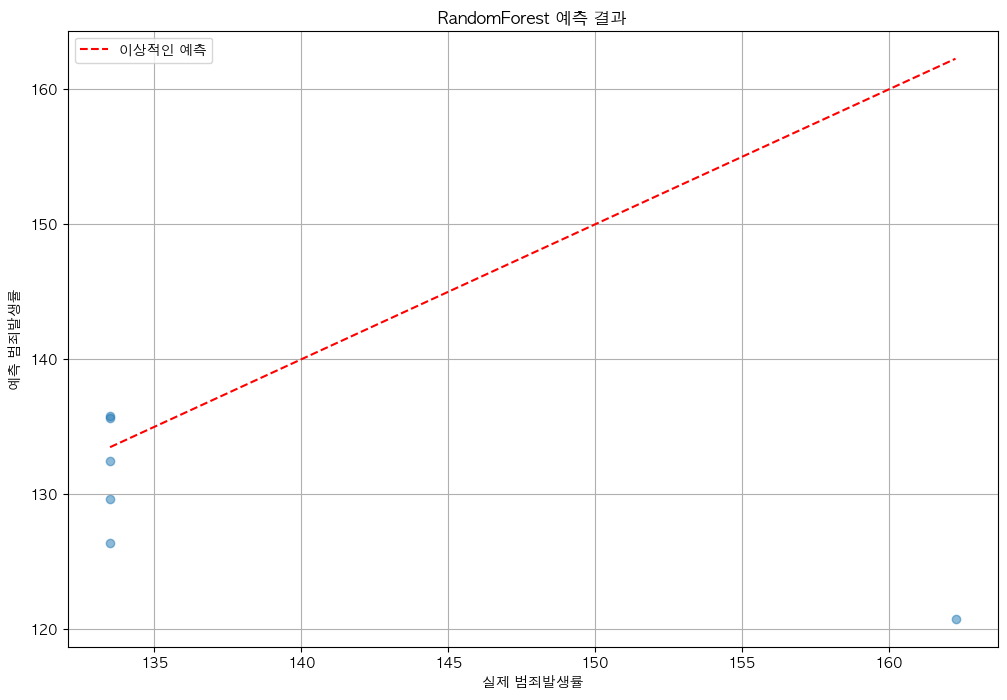

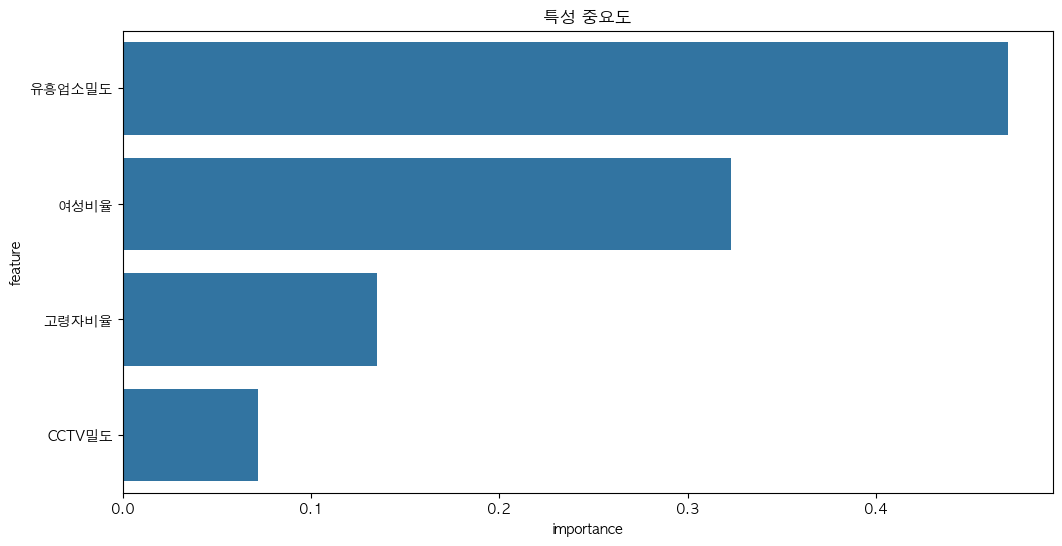

In [140]:
# 1. 데이터 확인
print("데이터 타입 확인:")
print(merged_data.dtypes)
print("\n결측치 확인:")
print(merged_data.isnull().sum())

# 2. 데이터 전처리
# 수치형 컬럼만 선택
numeric_columns = merged_data.select_dtypes(include=[np.number]).columns
print("\n수치형 컬럼:")
print(numeric_columns)

# 필요한 컬럼만 선택하여 전처리
features = ['CCTV밀도', '유흥업소밀도', '여성비율', '고령자비율']
target = '범죄발생률'

# 특성과 타겟 데이터 준비
X = merged_data[features].copy()
y = merged_data[target].copy()

# 결측치 처리
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
    X[col] = X[col].fillna(X[col].mean())

y = pd.to_numeric(y, errors='coerce')
y = y.fillna(y.mean())

print("\n전처리 후 데이터 통계:")
print(X.describe())
print("\n타겟 변수 통계:")
print(y.describe())

# 3. 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 4. 모델 학습
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# 5. 모델 학습 및 평가
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# 6. 성능 평가
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n모델 성능:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# 7. 결과 시각화
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='이상적인 예측')
plt.xlabel('실제 범죄발생률')
plt.ylabel('예측 범죄발생률')
plt.title('RandomForest 예측 결과')
plt.legend()
plt.grid(True)
plt.show()

# 8. 특성 중요도 시각화
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
importance = importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=importance)
plt.title('특성 중요도')
plt.show()

In [144]:
# 데이터 크기 확인
print("전체 데이터 크기:", len(merged_data))
print("\n각 구별 데이터:")
print(merged_data['구'].value_counts())

전체 데이터 크기: 27

각 구별 데이터:
구
종로구     2
중구      2
마포구     1
송파구     1
강남구     1
서초구     1
관악구     1
동작구     1
영등포구    1
금천구     1
구로구     1
강서구     1
양천구     1
서대문구    1
은평구     1
노원구     1
도봉구     1
강북구     1
성북구     1
중랑구     1
동대문구    1
광진구     1
성동구     1
용산구     1
강동구     1
Name: count, dtype: int64


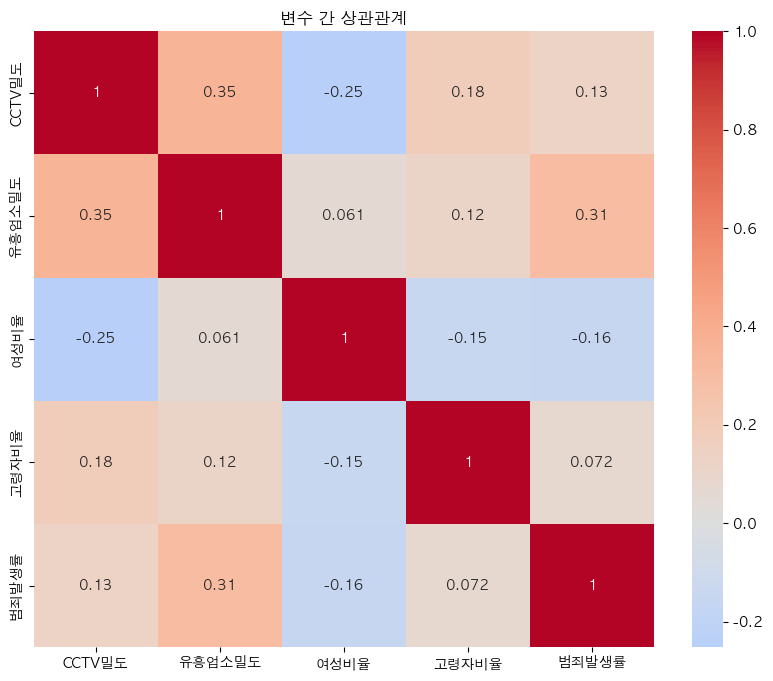

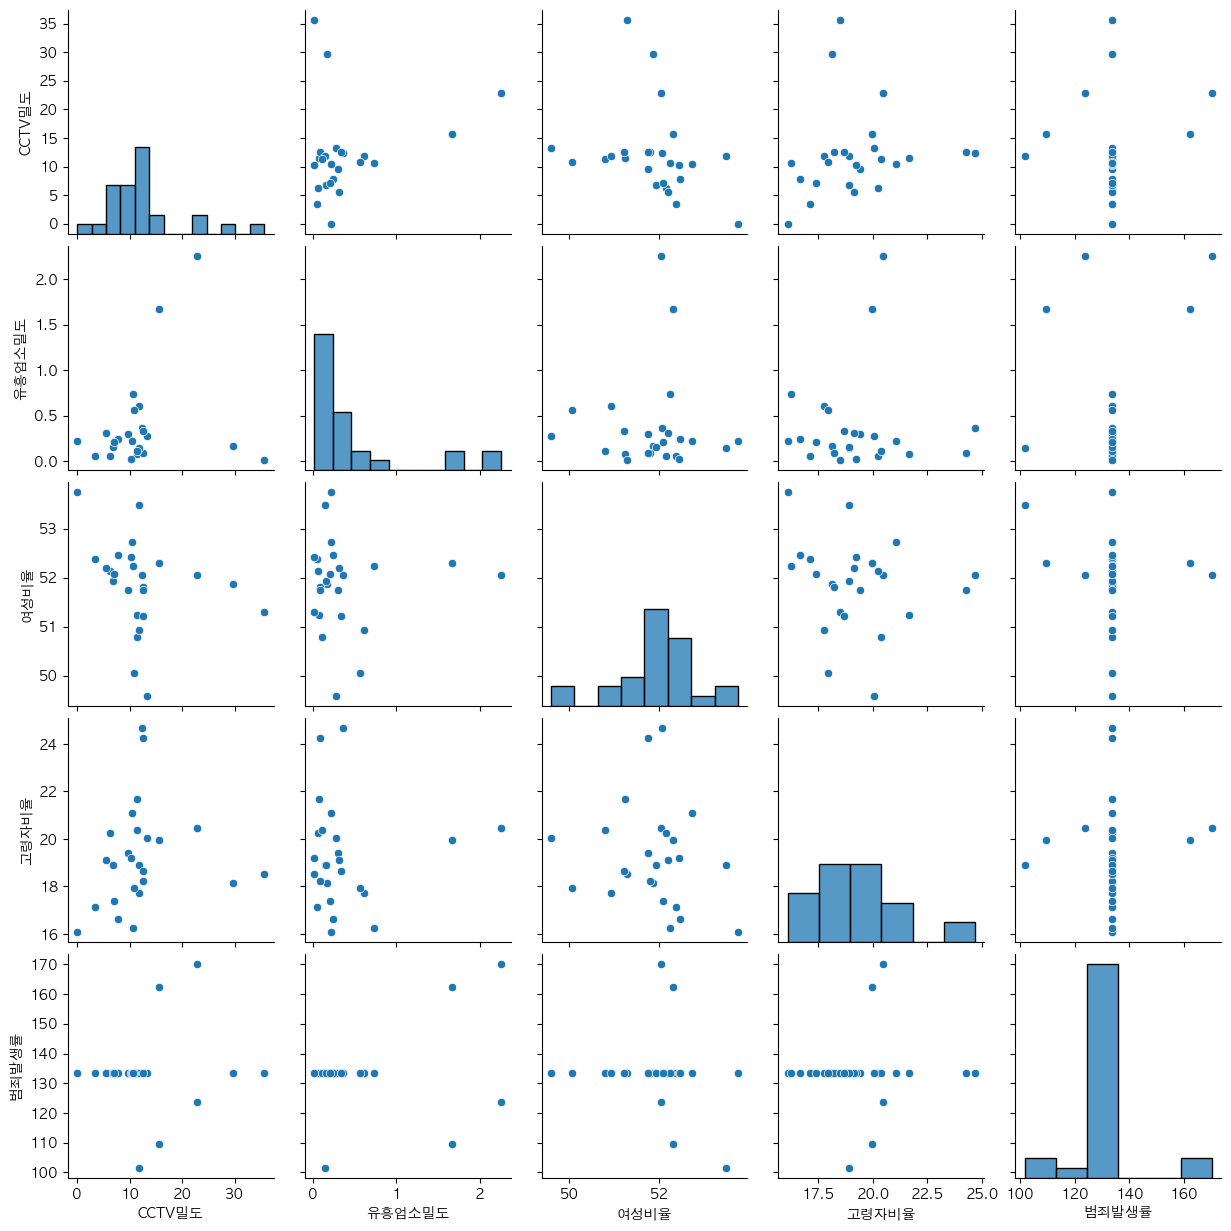

In [145]:
# 상관관계 분석
plt.figure(figsize=(10, 8))
correlation_matrix = X.join(pd.Series(y, name='범죄발생률')).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('변수 간 상관관계')
plt.show()

# 산점도 매트릭스
sns.pairplot(X.join(pd.Series(y, name='범죄발생률')))
plt.show()

In [146]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# 여러 모델 비교
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(kernel='rbf'),
    'RandomForest': RandomForestRegressor(n_estimators=100)
}

# 각 모델별 교차 검증
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
    print(f"\n{name}:")
    print(f"교차 검증 R² 점수: {scores}")
    print(f"평균 R² 점수: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


Linear Regression:
교차 검증 R² 점수: [-3.16062665e-01 -2.42775763e+28 -2.42889170e-01  0.00000000e+00
  0.00000000e+00]
평균 R² 점수: -4855515257000388117970026496.0000 (+/- 19422061028001552471880105984.0000)

Ridge:
교차 검증 R² 점수: [-2.47583680e-01 -1.97801882e+28 -2.52876629e-01  0.00000000e+00
  0.00000000e+00]
평균 R² 점수: -3956037632252060590925676544.0000 (+/- 15824150529008240164679450624.0000)

Lasso:
교차 검증 R² 점수: [-1.17860167e-01 -8.01826557e+27 -2.48022763e-01  0.00000000e+00
  0.00000000e+00]
평균 R² 점수: -1603653113214977626324598784.0000 (+/- 6414612452859910505298395136.0000)

SVR:
교차 검증 R² 점수: [-6.62419414e-02 -7.80994242e+24 -2.50000000e-01  0.00000000e+00
  0.00000000e+00]
평균 R² 점수: -1561988484179421539860480.0000 (+/- 6247953936717686159441920.0000)

RandomForest:
교차 검증 R² 점수: [-6.30768518e-02 -4.58293348e+27 -2.63900398e-01  0.00000000e+00
  0.00000000e+00]
평균 R² 점수: -916586696408124960421183488.0000 (+/- 3666346785632499841684733952.0000)


In [147]:
# 추가 특성 생성
X['CCTV_유흥업소_비율'] = X['CCTV밀도'] / X['유흥업소밀도']
X['여성_고령자_비율'] = X['여성비율'] * X['고령자비율']

# 다항 특성 추가
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# 다항 특성을 사용한 모델 학습
rf_model_poly = RandomForestRegressor(
    n_estimators=500,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
rf_model_poly.fit(X_train_poly, y_train)
y_pred_poly = rf_model_poly.predict(X_test_poly)

print("\n다항 특성 사용 모델 성능:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_poly):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_poly):.4f}")


다항 특성 사용 모델 성능:
MAE: 9.2756
RMSE: 17.8987
R² Score: -1.7863


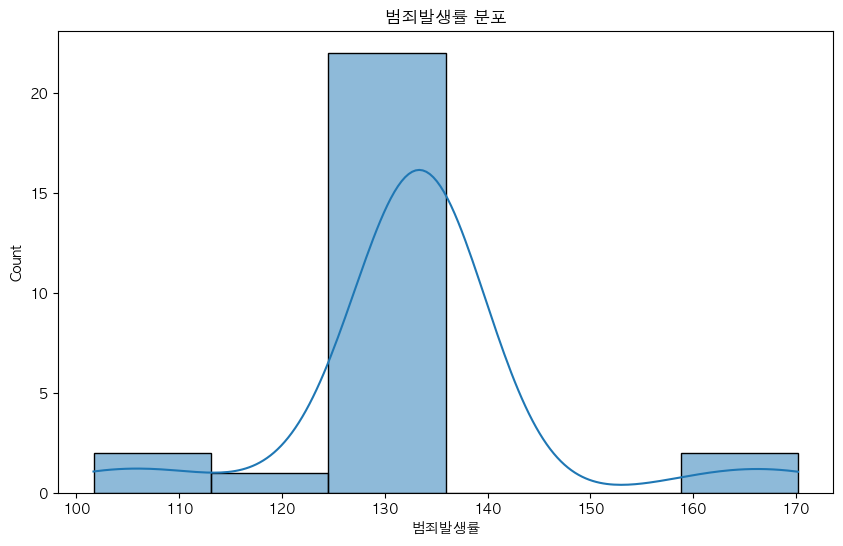

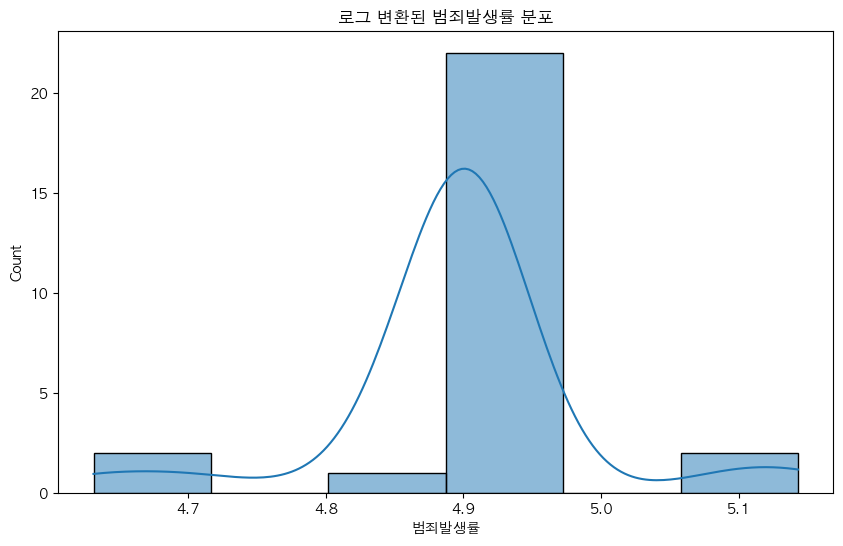


로그 변환 사용 모델 성능:
MAE: 10.3565
RMSE: 18.0054
R² Score: -1.8197


In [148]:
# 타겟 변수 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('범죄발생률 분포')
plt.show()

# 로그 변환 시도
y_log = np.log1p(y)
plt.figure(figsize=(10, 6))
sns.histplot(y_log, kde=True)
plt.title('로그 변환된 범죄발생률 분포')
plt.show()

# 로그 변환된 타겟으로 모델 학습
rf_model_log = RandomForestRegressor(
    n_estimators=500,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

X_train, X_test, y_train_log, y_test_log = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)
rf_model_log.fit(X_train, y_train_log)
y_pred_log = rf_model_log.predict(X_test)

# 역변환하여 성능 평가
y_pred_original = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test_log)

print("\n로그 변환 사용 모델 성능:")
print(f"MAE: {mean_absolute_error(y_test_original, y_pred_original):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_original, y_pred_original)):.4f}")
print(f"R² Score: {r2_score(y_test_original, y_pred_original):.4f}")